<a href="https://colab.research.google.com/github/vipul2710/DS-projects/blob/main/Car_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data Preperation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data

--2024-01-14 08:07:41--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2024-01-14 08:07:41 (25.5 MB/s) - ‘data.csv’ saved [1475504/1475504]



Wget used for downloadign data from github

In [5]:
df=pd.read_csv('data.csv')

In [6]:
len(df)

11914

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
string_dat = list(df.dtypes[df.dtypes == 'object'].index)
string_dat

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [12]:
for col in string_dat:
  df[col] =  df[col].str.lower().str.replace(' ','_')

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


EDA

In [14]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of prices

<Axes: xlabel='msrp', ylabel='Count'>

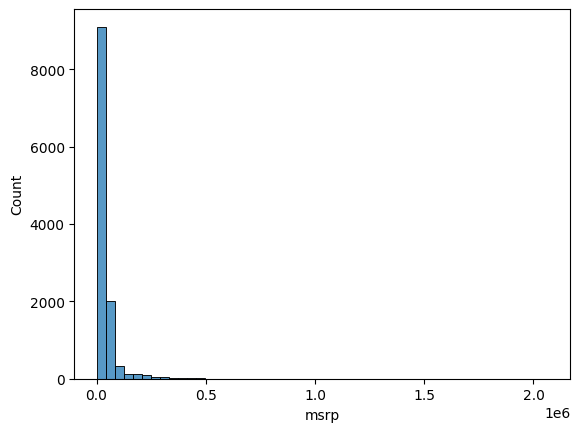

In [15]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

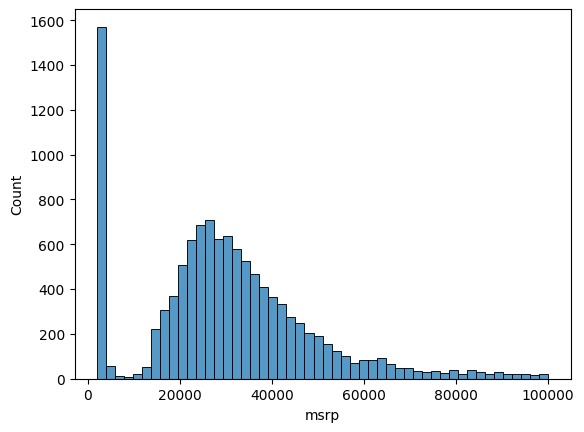

In [16]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

In [17]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000+ 1, 100000+ 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [18]:
price_log = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

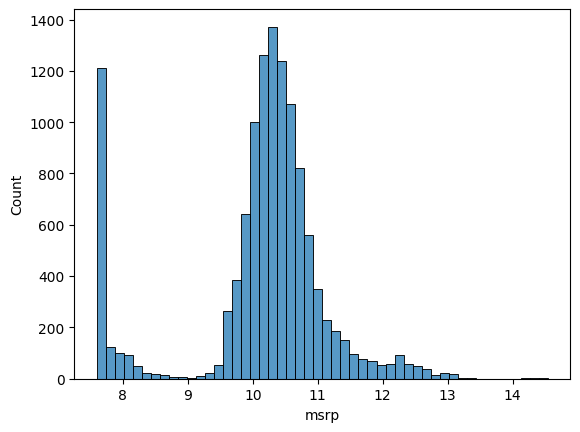

In [19]:
sns.histplot(price_log,bins=50)

Find how many values are missing

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [21]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [22]:
idx = np.arange(n)

In [23]:
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [25]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [26]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [27]:
df_train= df_train.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [28]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [29]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [30]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


Simple Linear Regression

In [31]:
xi = [453,11,86]

In [32]:
#Weight and bias(W0)
w0 = 7.17
w=[0.01,0.04,0.002]

In [33]:
def lin_reg(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
    pred = pred + w[j] * xi[j]

    return pred

In [34]:
lin_reg(xi)

11.7

In [35]:
np.expm1(11.7)

120570.71498645052

LR in vector form

In [36]:
def dot(xi,w):
  n= len(xi)

  res = 0.0

  for j in range(n):
    res = res + xi[j]*w[j]

    return res

In [37]:
def linear_regression(xi):
  return w0 + dot(xi,w)

In [38]:
w_new = [w0] + w

In [39]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [40]:
#linear regression for features xi0 is always 1
def linear_regression(xi):
  xi = [1] + xi

  return dot(xi,w_new)

In [41]:
linear_regression(xi)

7.17

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # look at number of rows in matrix
    X = np.column_stack([ones, X]) # take matrix and stack them togerther

    XTX = X.T.dot(X) #gram matrix
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

Car Price Baseline model

In [43]:
df_train.dtypes #checking numerical data

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [44]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [45]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

df_train[base]

X_train = df_train[base].values

In [46]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [47]:
df_train[base].fillna(0)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [48]:
X_train = df_train[base].fillna(0).values

In [49]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [50]:
w0, w = train_linear_regression(X_train,y_train)

In [51]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

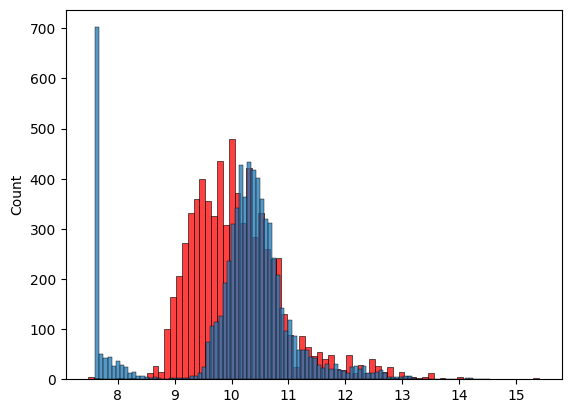

In [52]:
sns.histplot(y_pred, color = 'red')
sns.histplot(y_train)

RMSE:(g(xi)-y(i))2 diff between pred and actual value
calculate difference and then square it
is called squared Error
now take avg of that which will calcualte Mean squared theorem
after that we will take the square root

In [55]:
def rmse(y,y_pred):
  error = y-y_pred
  Sqerror = error ** 2
  mse = Sqerror.mean()
  return np.sqrt(mse)


In [56]:
rmse(y_train,y_pred)

0.7554192603920132

In [ ]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)


In [61]:
#feature matrix
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X



In [62]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)


0.761653099130156

Simple Feature engineering

In [63]:
def prepare_X(df):
  df = df.copy()

  df['age'] = 2017-df.year
  features = base + ['age']
  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)


0.5172055461058299

<Axes: ylabel='Count'>

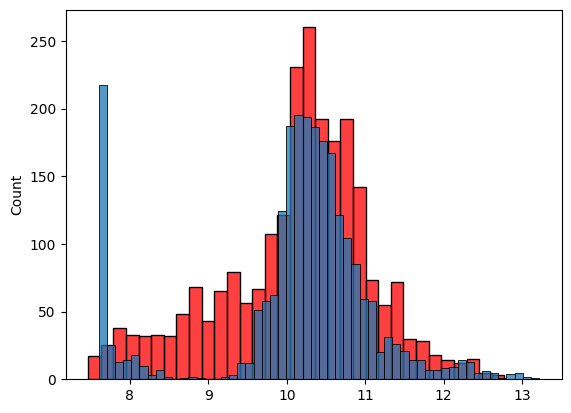

In [65]:
sns.histplot(y_pred, color = 'red')
sns.histplot(y_val)

In [67]:
#number of doors
for v in [2,3,4]:
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [77]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [113]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 113.20645472118994
validation: 55.22691647401435


In [79]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [101]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 113.20645472118994
validation: 55.22691647401435


In [102]:
w_0

7.181697276886033

In [91]:
def train_linear_regression_reg(X, y,r):
    ones = np.ones(X.shape[0]) # look at number of rows in matrix
    X = np.column_stack([ones, X]) # take matrix and stack them togerther

    XTX = X.T.dot(X) #gram matrix
    XTX = XTX + 0.01 *np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [103]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.01)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.464312489456461
validation: 0.4602394963124682


In [104]:
#Reglarisation diff values of R
for r in  [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train,r=r)
  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)

  print(r, w0, score)


0.0 7.181697276886033 0.4602394963124682
1e-05 7.181697276886033 0.4602394963124682
0.0001 7.181697276886033 0.4602394963124682
0.001 7.181697276886033 0.4602394963124682
0.1 7.181697276886033 0.4602394963124682
1 7.181697276886033 0.4602394963124682
10 7.181697276886033 0.4602394963124682


Using the model

In [105]:
df_full_train = pd.concat([df_train,df_val])

In [106]:
df_full_train = df_full_train.reset_index (drop = True)

In [107]:
X_full_train = prepare_X(df_full_train)

In [108]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [109]:
y_full_train = np.concatenate([y_train,y_val])

In [116]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.001)

In [115]:
w

array([ 6.00490092e-02,  2.55203273e+01,  4.44342207e+00,  6.89769974e-01,
        6.14317227e-03,  1.26088992e+00,  3.77815571e+03,  3.81259334e+03,
        3.78243724e+03,  8.26993745e-01, -1.58725099e+01,  2.93394649e+01,
        4.80080799e+00, -7.10129059e+00,  4.17412009e+01,  3.28120926e+01,
        4.90032752e+01,  1.20433702e+00, -2.90116042e+02, -2.86668139e+02,
       -3.95188861e+02, -8.11574469e+15, -8.11574469e+15, -8.11574469e+15,
       -8.11574469e+15,  1.16484098e+01,  1.34175467e+01,  1.45519491e+01,
        8.32476165e+00, -2.34927762e+01, -1.05298919e+02, -1.27044686e+02,
       -1.12735070e+02, -7.67460186e-02,  4.14645821e-02,  1.86187511e-01,
        3.55798979e-01, -2.14066472e-01])

In [117]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.45616344232785627

In [126]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [127]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [128]:
X_small = prepare_X(df_small)

In [130]:
y_pred = w0+X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.429208250962425

In [131]:
np.expm1(y_pred)

33832.551970674904

In [132]:
y_test[20]

10.463131911491967

In [133]:
np.expm1(y_test[20])

35000.00000000001